In [3]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

In [69]:
start = datetime.datetime(2022,1,1) 
end = datetime.datetime(2022,8,1) 

SP500 = yf.Ticker("^GSPC").history(start=start, end=end) #S&P 500
Nasdaq =yf.Ticker("^NDX").history(start=start, end=end) #Nasdaq 100
DWJ = yf.Ticker("^DJI").history(start=start, end=end) #Dow JOnes Industrial Average
IPC = yf.Ticker('^MXX').history(start=start, end=end) #IPC (BMV)
Nikkei = yf.Ticker('^N225').history(start=start, end=end) #Nikkei

In [43]:
print(DWJ)
print(DWJ.index)

                    Open          High           Low         Close     Volume  \
Date                                                                            
2022-01-03  36321.589844  36595.820312  36246.449219  36585.058594  347930000   
2022-01-04  36636.000000  36934.839844  36636.000000  36799.648438  435080000   
2022-01-05  36722.601562  36952.648438  36400.390625  36407.109375  462040000   
2022-01-06  36409.050781  36464.191406  36200.679688  36236.468750  385890000   
2022-01-07  36249.589844  36382.839844  36111.531250  36231.660156  356110000   
...                  ...           ...           ...           ...        ...   
2022-08-01  32755.710938  32972.031250  32640.789062  32798.398438  321180000   
2022-08-02  32691.289062  32772.929688  32387.119141  32396.169922  316740000   
2022-08-03  32514.210938  32912.738281  32514.210938  32812.500000  342160000   
2022-08-04  32805.691406  32829.218750  32652.630859  32726.820312  315590000   
2022-08-05  32593.900391  32

In [70]:
DWJ_serie = pd.Series(data = DWJ["High"], index = DWJ.index)
SP500_serie = pd.Series(data = SP500["High"], index = SP500.index)
Nasdaq_serie = pd.Series(data = Nasdaq["High"], index = Nasdaq.index)
IPC_serie = pd.Series(data = IPC["High"], index=IPC.index)
Nikkei_serie = pd.Series(data = Nikkei["High"], index=IPC.index)


Text(0.5, 0, 'Meses')

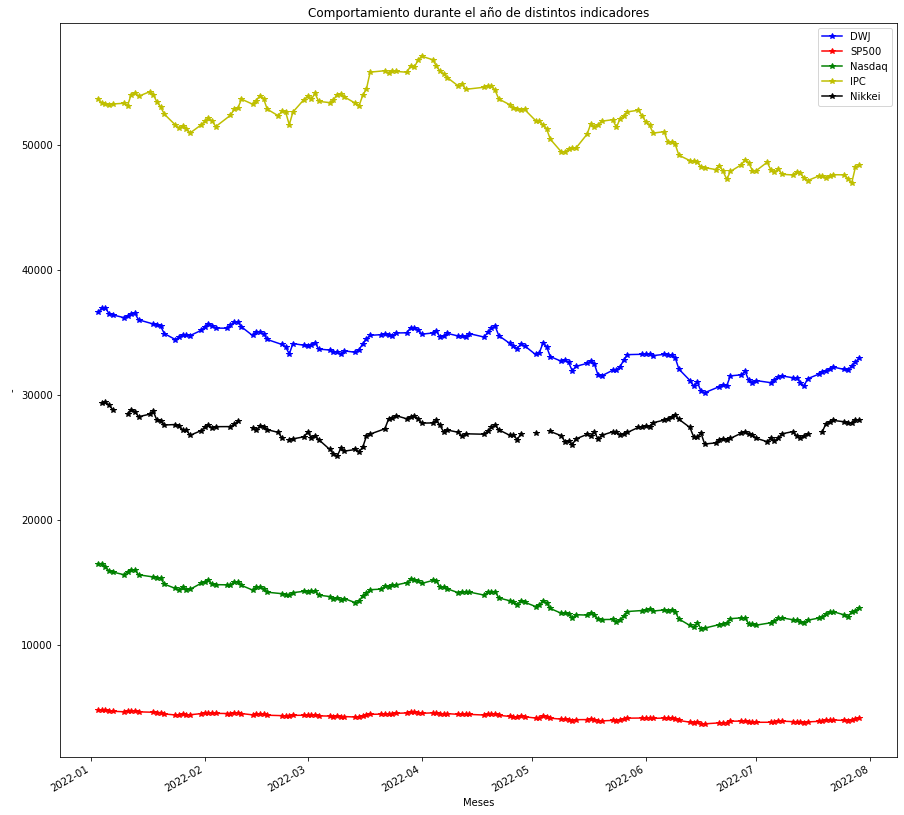

In [71]:
plt.figure(figsize=(15, 15))
DWJ_serie.plot(linestyle='-', marker='*', color='b')
SP500_serie.plot(linestyle='-', marker='*', color='r')
Nasdaq_serie.plot(linestyle='-', marker='*', color='g')
IPC_serie.plot(linestyle='-', marker='*', color='y')
Nikkei_serie.plot(linestyle='-', marker='*', color='black')
plt.legend(['DWJ','SP500','Nasdaq','IPC', "Nikkei"], loc=1)
plt.title('Comportamiento durante el año de distintos indicadores')
plt.ylabel('-')
plt.xlabel('Meses')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

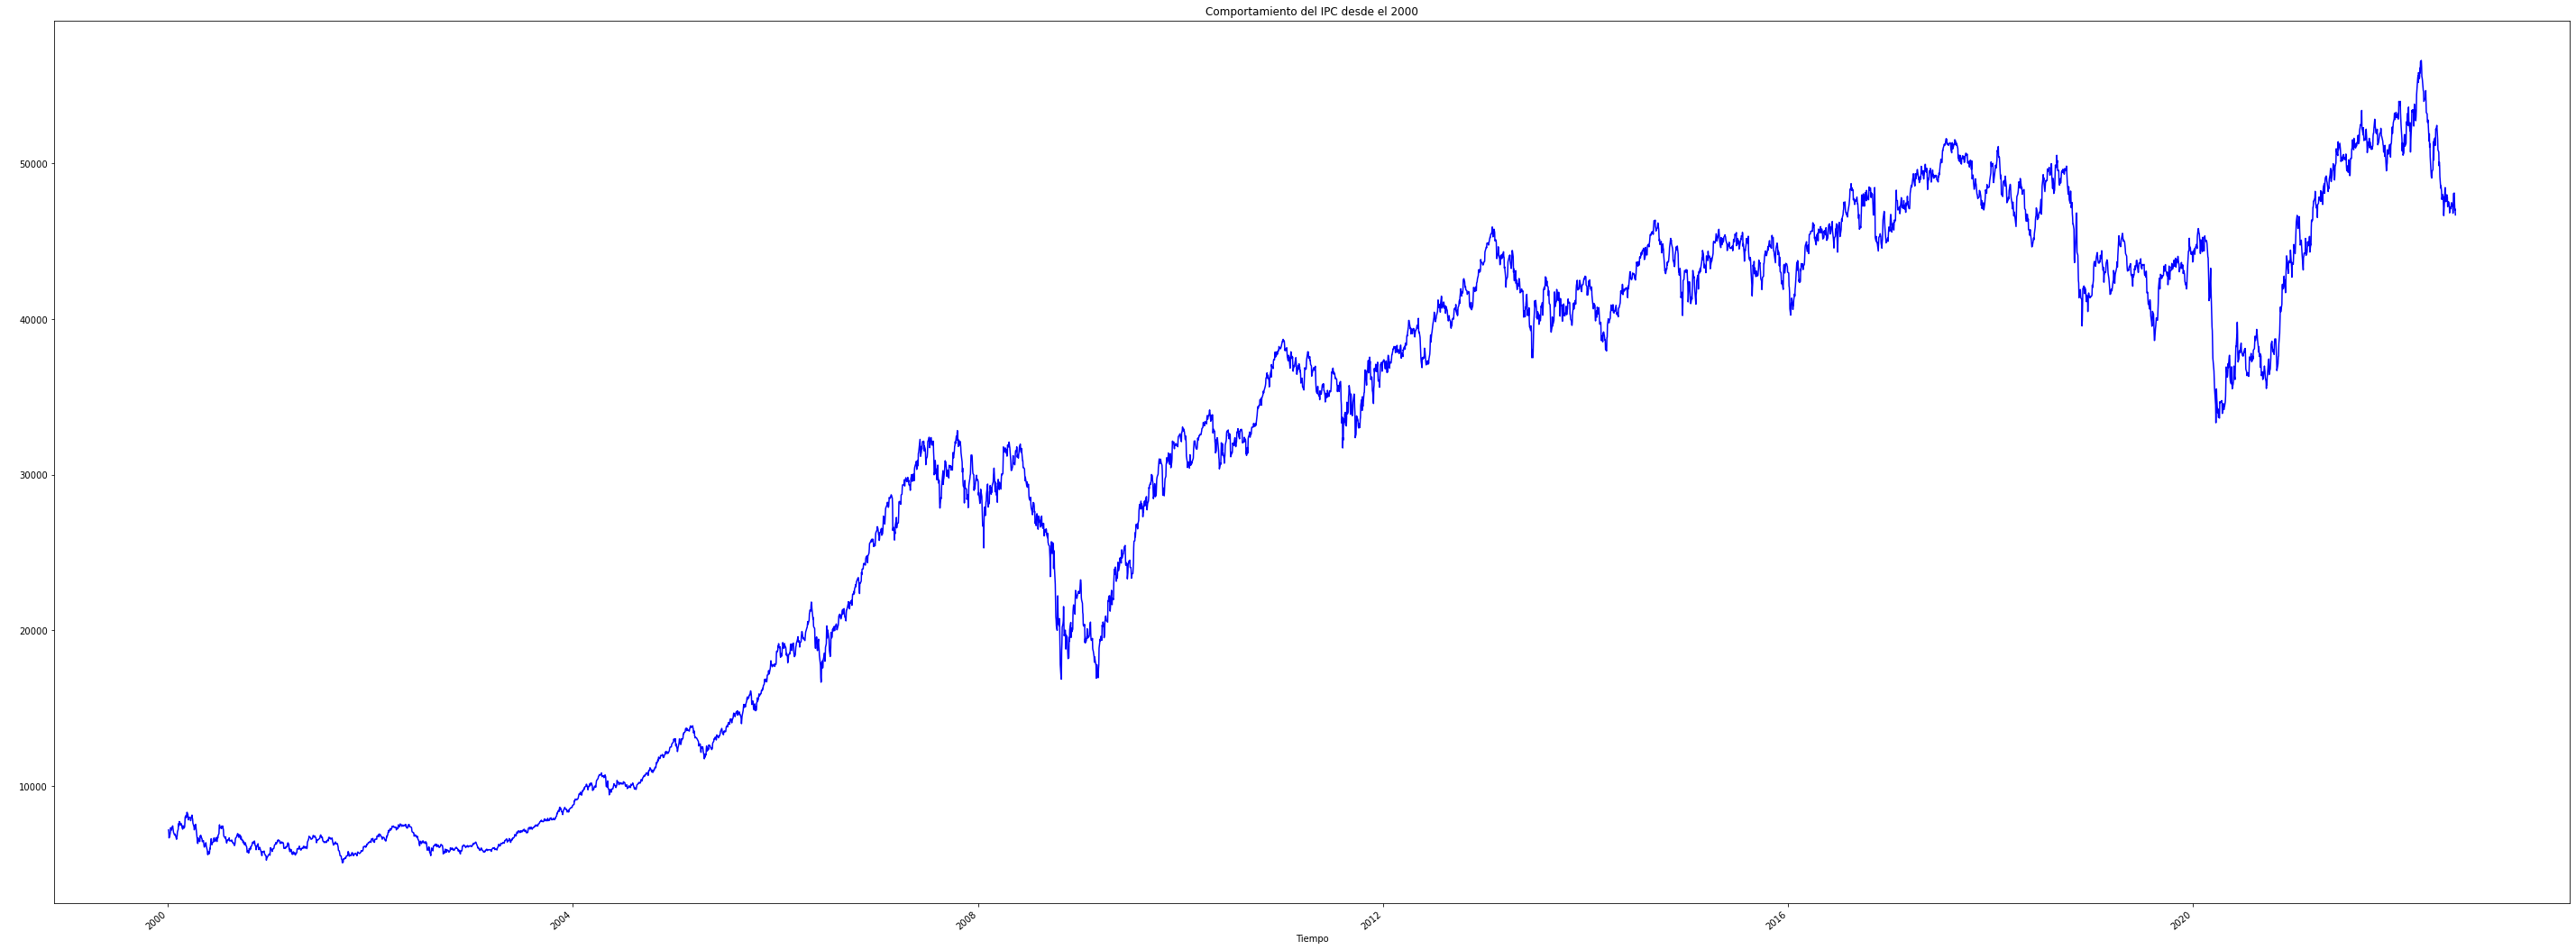

In [51]:
start = datetime.datetime(2000,1,1) 
end = datetime.datetime(2022,8,8) 

IPC = yf.Ticker('^MXX').history(start=start, end=end) #IPC (BMV)

plt.figure(figsize=(50, 20))
IPC['Open'].plot(color='b')
plt.title('Comportamiento del IPC desde el 2000')
plt.xlabel('Tiempo')
plt.ylabel(' ')
plt.xticks(rotation=40)

In [52]:
from sklearn.linear_model import LinearRegression

trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(IPC.index).reshape((-1,1)), IPC['Open'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

C:\Users\aedmu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Trend model coefficient=7.080813974027797e-14 and intercept=-61540.7757120748


In [58]:
residuals = np.array(IPC['Open']) - trend_model.predict(np.array(IPC.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=IPC.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

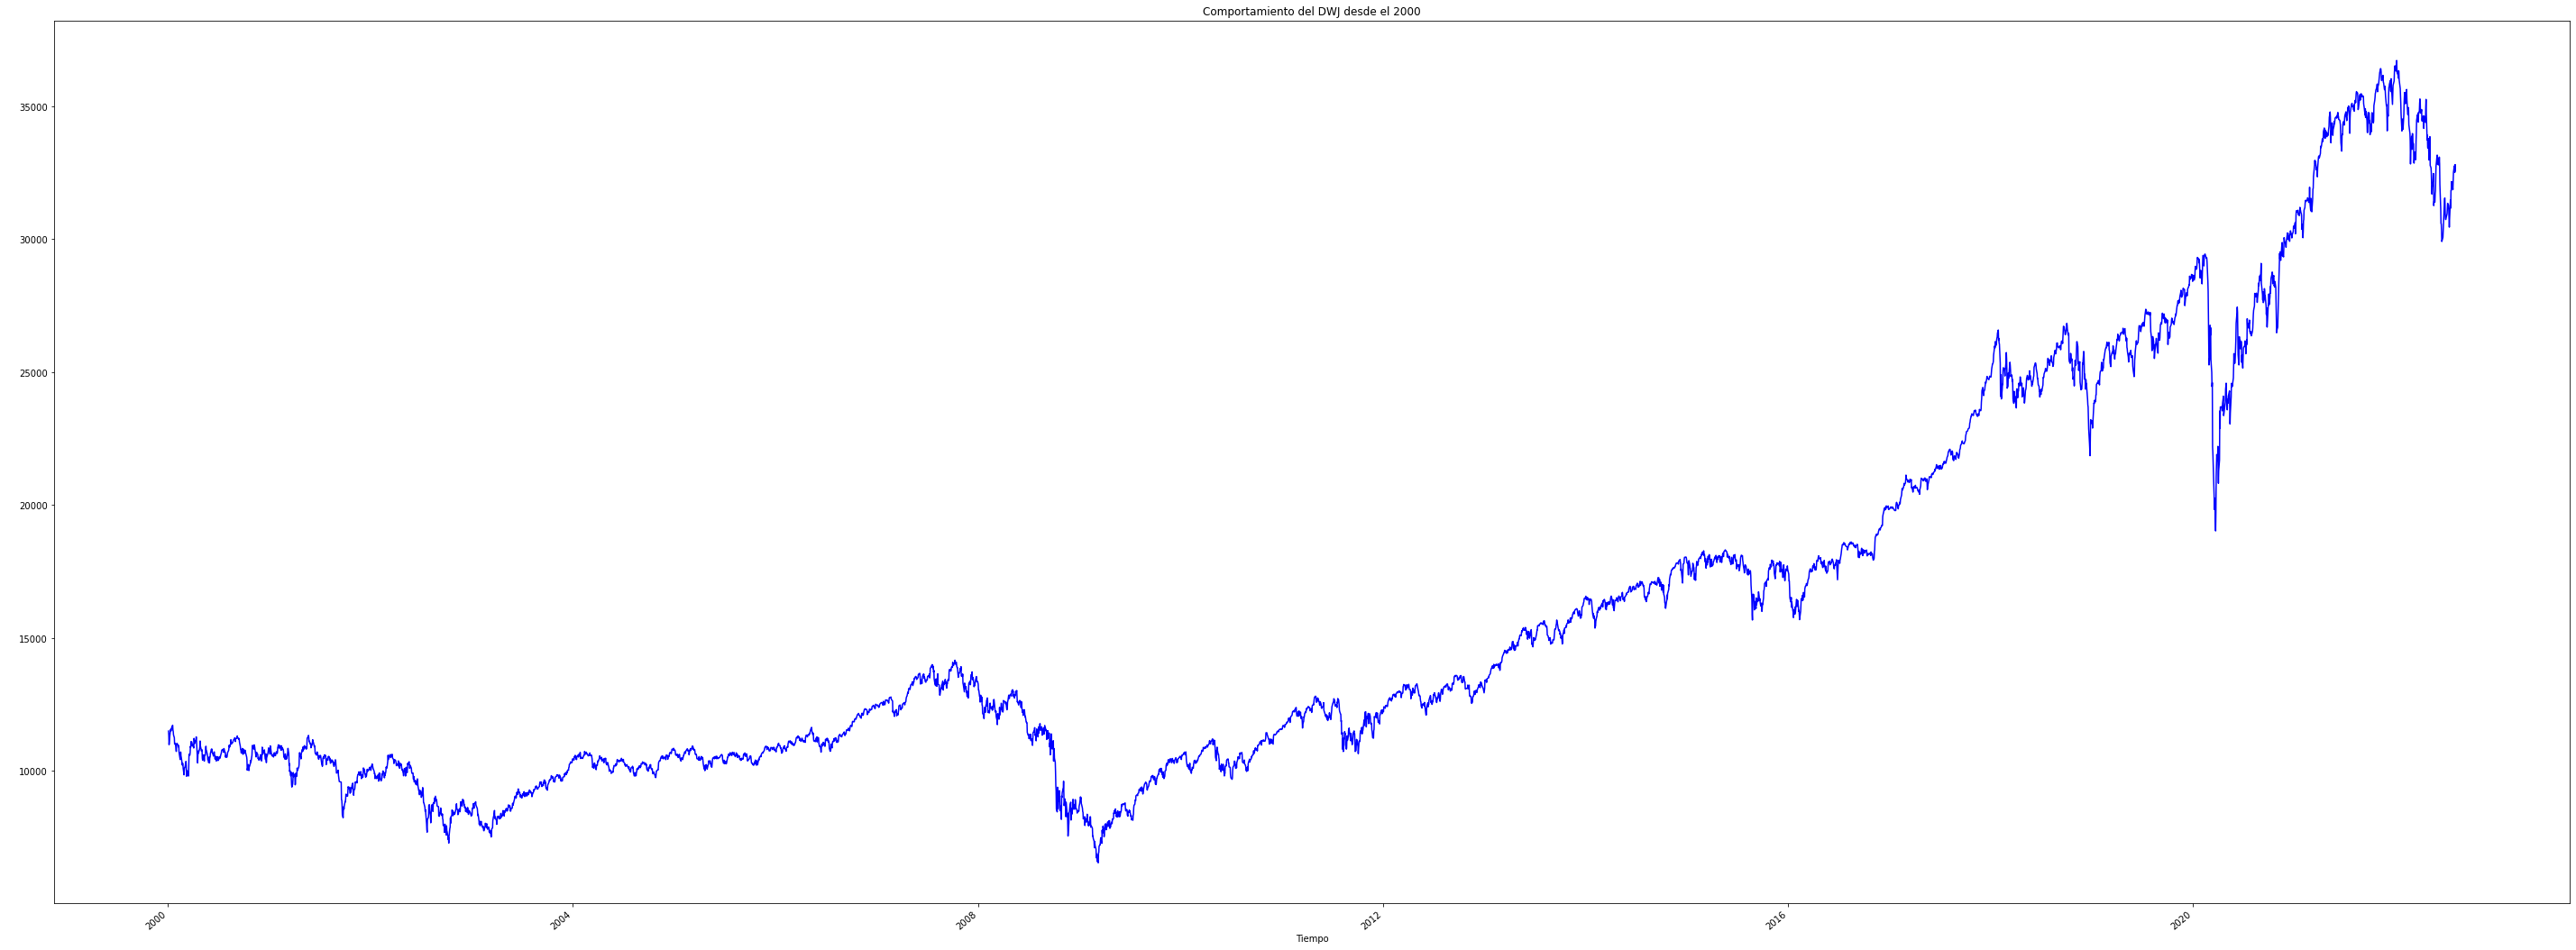

In [59]:
start = datetime.datetime(2000,1,1) 
end = datetime.datetime(2022,8,8) 

DWJ = yf.Ticker('^DJI').history(start=start, end=end) #Dow Jones

plt.figure(figsize=(50, 20))
DWJ['Open'].plot(color='b')
plt.title('Comportamiento del DWJ desde el 2000')
plt.xlabel('Tiempo')
plt.ylabel(' ')
plt.xticks(rotation=40)